# Scaling
Machine learning algorithms that rely on the distance between data points require scaled data.
Scaling the data ensures that all features are on the same scale.

## Minmax Scaler

Scales Values
- Transforms data values to a range between 0 (min) and 1 (max).

Formula
- $\displaystyle scaled(data) =\frac{data-min}{max-min}$

​Ensure that both training and test data are scaled in the same way using the min and max of training data.


In [8]:
# data
data = [[1],[2],[3],[4],[5]]

In [9]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [10]:
# transform data
scaler.transform(data)

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [11]:
# transform 2.5
scaler.transform([[2.5]])

array([[0.375]])

## Data

In [12]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
scaler = MinMaxScaler()

In [15]:
# apply min_max_scaler to training and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [16]:
# original first training data
X_train[0]

array([1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
       2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
       1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
       1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
       9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02])

In [17]:
# scaled first training data
X_train_scaled[0]

array([0.2546158 , 0.11531958, 0.24164177, 0.14824509, 0.15274894,
       0.06133142, 0.0529522 , 0.0582008 , 0.09076348, 0.12320977,
       0.01510049, 0.02404526, 0.01686849, 0.01097875, 0.10259374,
       0.0841019 , 0.04171717, 0.11185831, 0.15506365, 0.04098089,
       0.18061545, 0.09381663, 0.16730212, 0.0876836 , 0.16973443,
       0.0959906 , 0.1234388 , 0.18439863, 0.14665878, 0.11961682])

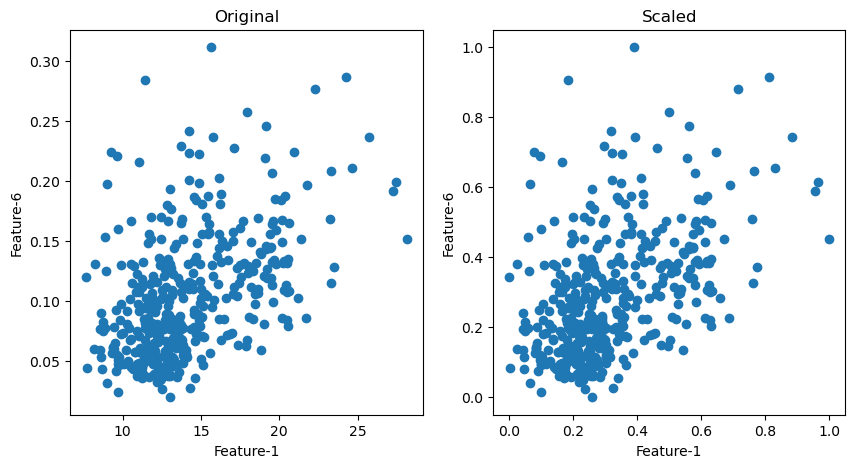

In [19]:
# effect of scaling 1st and 6th ones
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.scatter(X_train[:,0], X_train[:,5])
plt.xlabel('Feature-1')
plt.ylabel('Feature-6')
plt.subplot(1,2,2)
plt.title('Scaled')
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,5])
plt.xlabel('Feature-1')
plt.ylabel('Feature-6')
plt.tight_layout;


## kNN with scaled data

In [20]:
# knn classifier applied to the original data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.9507042253521126, 0.9300699300699301)

In [21]:
# knn classifier applied to the scaled data
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9906103286384976, 0.972027972027972)